In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_index = pd.read_csv('/Applications/Repos/GitHub/Expedition/Python/Linear/economic_index.csv')

In [7]:
df_index.drop('Unnamed: 0',axis=1,inplace=True)

In [10]:
df_index.drop(columns=['year','month'],axis=1,inplace=True)

In [13]:
# check null

df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

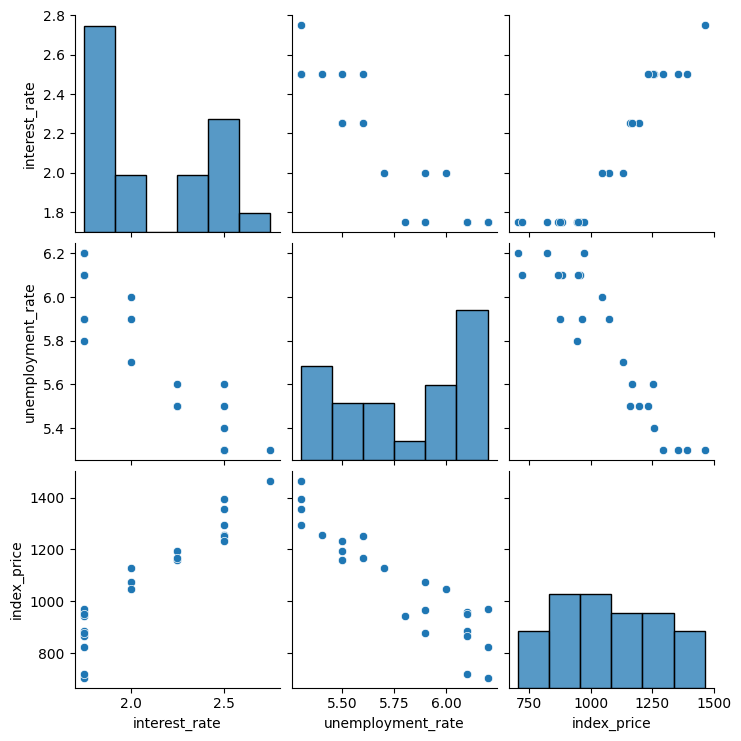

In [14]:
import seaborn as sns
sns.pairplot(df_index)

In [15]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

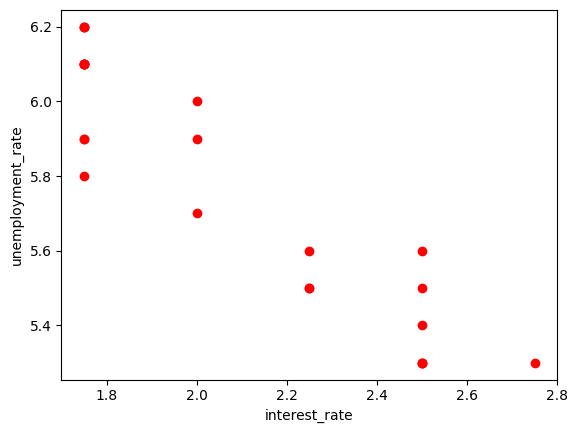

In [23]:
# visualize the data points more closely

plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')

In [34]:
X = df_index[['interest_rate','unemployment_rate']]
y = df_index['index_price']

In [35]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [36]:
# train test slipt

from sklearn.model_selection import train_test_split 
X_train , X_test, y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [40]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

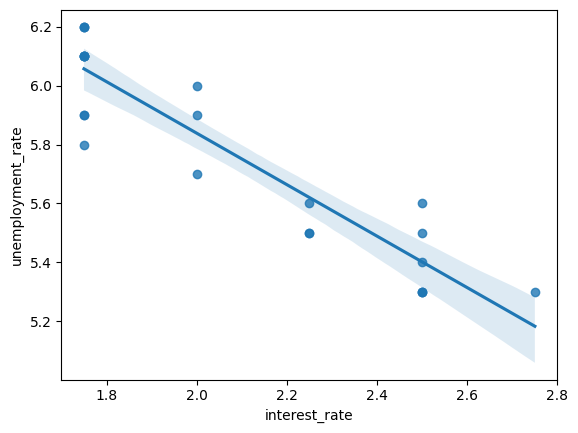

In [42]:
sns.regplot(x=df_index['interest_rate'],y=df_index['unemployment_rate'])

In [43]:
from sklearn.preprocessing import StandardScaler


In [46]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [47]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [48]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [49]:
regression.fit(X_train,y_train)

LinearRegression()

In [50]:
# predection
y_pred = regression.predict(X_test)

In [51]:
# performance metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error

In [53]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

8108.567426306613
73.804449323371
90.04758423359625


In [55]:
# R2 score

from sklearn.metrics import r2_score

score = r2_score(y_test,y_pred)
print(score)


0.7591371539010254


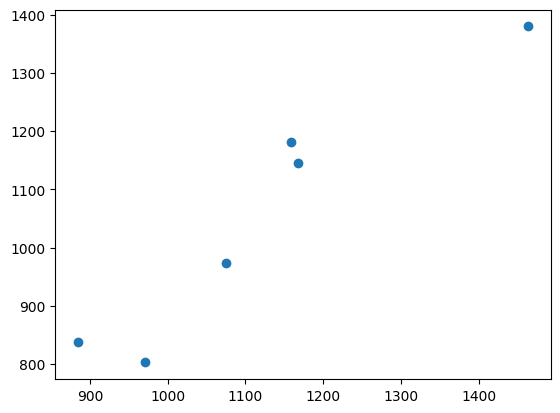

In [56]:
# assumptions

plt.scatter(y_test,y_pred)

In [57]:
residuals = y_test - y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


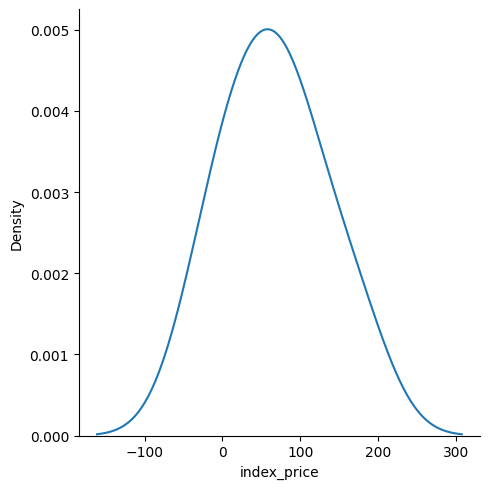

In [59]:
sns.displot(residuals,kind='kde')

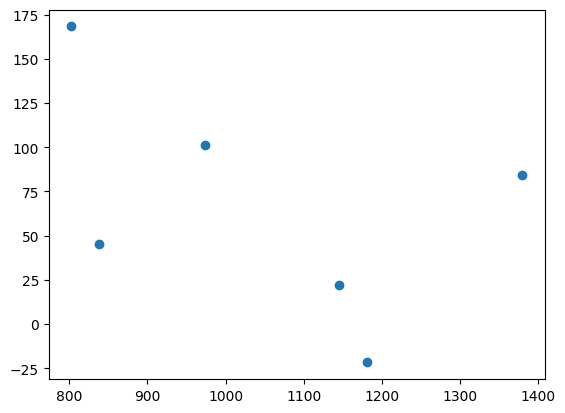

In [62]:
plt.scatter(y_pred,residuals)    # if uniformly ditribued its good to go
